In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
X=iris.data
Y=iris.target

In [10]:
X[0]  #花萼的長度寬度、花瓣的長度寬度

array([5.1, 3.5, 1.4, 0.2])

In [11]:
X[0][2:] #我們只取花瓣的長度寬度

array([1.4, 0.2])

In [12]:
X=X[:,2:]

In [13]:
X[0]

array([1.4, 0.2])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,
                                              test_size=0.2,random_state=87)

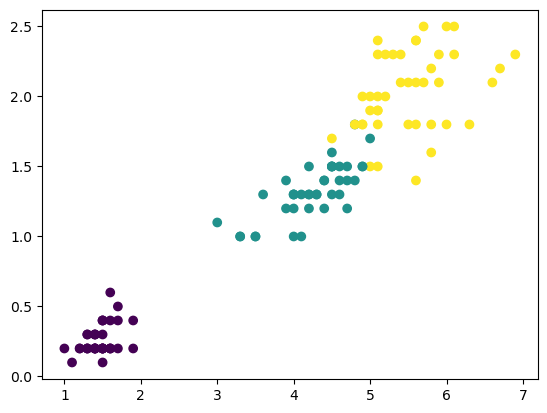

In [16]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)  #花瓣的長度寬度

In [17]:
from sklearn.svm import SVC

In [18]:
clf=SVC()

In [19]:
clf.fit(x_train,y_train)

SVC()

In [20]:
y_predict=clf.predict(x_test)

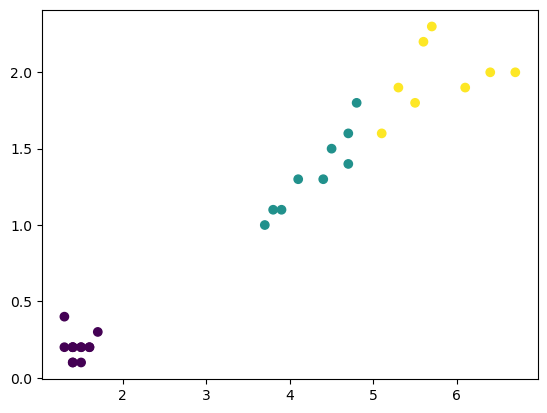

In [21]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_predict)

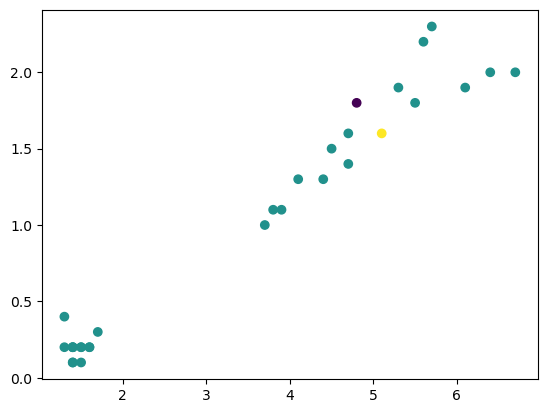

In [23]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_predict-y_test) #相減, 愈接近0, 代表確正確

# 0706 很酷的分類畫圖contourf

# 更炫的畫圖法

In [28]:
np.arange(0.3,10.3,0.2)    #0.3~10.3的區間, 每隔0.2取一點

array([ 0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,  2.3,
        2.5,  2.7,  2.9,  3.1,  3.3,  3.5,  3.7,  3.9,  4.1,  4.3,  4.5,
        4.7,  4.9,  5.1,  5.3,  5.5,  5.7,  5.9,  6.1,  6.3,  6.5,  6.7,
        6.9,  7.1,  7.3,  7.5,  7.7,  7.9,  8.1,  8.3,  8.5,  8.7,  8.9,
        9.1,  9.3,  9.5,  9.7,  9.9, 10.1])

### meshgrid

In [31]:
x1, x2=np.meshgrid(np.arange(0,7,0.02),np.arange(0,3,0.02))

In [38]:
x1

array([[0.  , 0.02, 0.04, ..., 6.94, 6.96, 6.98],
       [0.  , 0.02, 0.04, ..., 6.94, 6.96, 6.98],
       [0.  , 0.02, 0.04, ..., 6.94, 6.96, 6.98],
       ...,
       [0.  , 0.02, 0.04, ..., 6.94, 6.96, 6.98],
       [0.  , 0.02, 0.04, ..., 6.94, 6.96, 6.98],
       [0.  , 0.02, 0.04, ..., 6.94, 6.96, 6.98]])

In [34]:
xx=[1,2,3,4]
yy=[5,6,7,8]

In [39]:
np.c_[xx,yy]  # 跟zip很像的numpy指令 np.c_[xx,yy]

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

In [40]:
z=clf.predict(np.c_[x1.ravel(),x2.ravel()])

In [43]:
z=z.reshape(x1.shape)  #格式要換成像 x1的格式

In [45]:
z

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

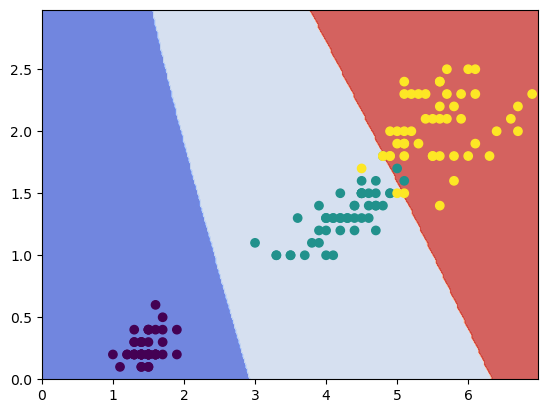

In [49]:
plt.contourf(x1,x2,z,cmap=plt.cm.coolwarm, alpha=0.8)  # colormap 去查 matplotlib 應用程式的主題
plt.scatter(X[:,0],X[:,1],c=Y)